In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_delivery = pd.read_csv('../01_CSV Trabajo/df_final.csv')

In [3]:
df_delivery.head()

,grouped_category,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,order_day,delivery_duration
0,American,33.0,14.0,21.0,22,Friday,3779.0
1,Mexican,1.0,2.0,2.0,21,Tuesday,4024.0
2,Indian,8.0,6.0,18.0,0,Monday,1586.0
3,Italian,5.0,6.0,8.0,3,Thursday,2273.0
4,Italian,5.0,5.0,7.0,2,Tuesday,2988.0


In [4]:
# Revisar la distribución de las características numéricas y la variable objetivo
df_delivery.describe()

,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,delivery_duration
count,166468.000000,166468.000000,166468.000000,166468.000000,166468.000000
mean,44.659196,41.621032,57.696254,8.633719,2776.708310
std,34.477872,32.115298,52.508727,8.712715,967.289328
min,0.000000,0.000000,0.000000,0.000000,101.000000
25%,17.000000,15.000000,17.000000,2.000000,2079.000000
50%,36.000000,34.000000,40.000000,3.000000,2620.000000
75%,65.000000,62.000000,84.000000,19.000000,3309.000000
max,171.000000,154.000000,278.000000,23.000000,6405.000000


In [5]:
# Convertir la columna 'delivery_duration' de segundos a minutos
df_delivery['delivery_duration'] = df_delivery['delivery_duration'] / 60

# Verificar los primeros valores de la columna para asegurarnos de que la conversión fue correcta
df_delivery[['delivery_duration']].head()

,delivery_duration
0,62.983333
1,67.066667
2,26.433333
3,37.883333
4,49.800000


In [6]:
# Calcular el IQR (Rango Intercuartílico) de la columna 'delivery_duration'
Q1 = df_delivery['delivery_duration'].quantile(0.25)
Q3 = df_delivery['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos eliminando los outliers
df_delivery_l = df_delivery[(df_delivery['delivery_duration'] >= lower_bound) & (df_delivery['delivery_duration'] <= upper_bound)]

# Verificar la descripción de la columna 'delivery_duration' después de eliminar outliers
df_delivery_l['delivery_duration'].describe()


count    162381.000000
mean         45.077688
std          14.379677
min           4.950000
25%          34.416667
50%          43.200000
75%          54.066667
max          85.900000
Name: delivery_duration, dtype: float64

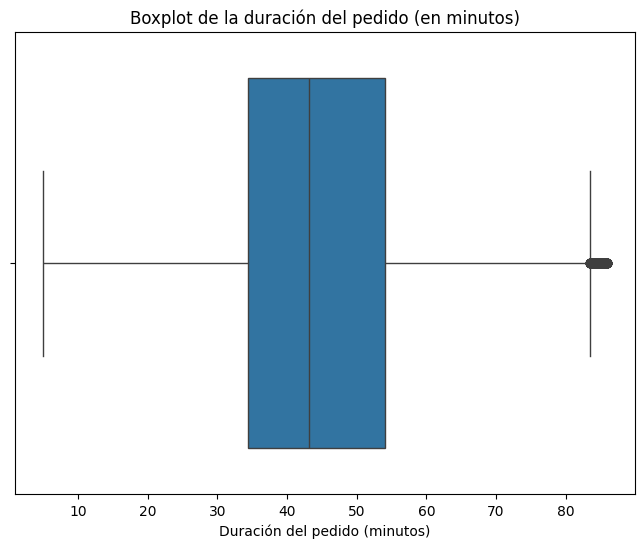

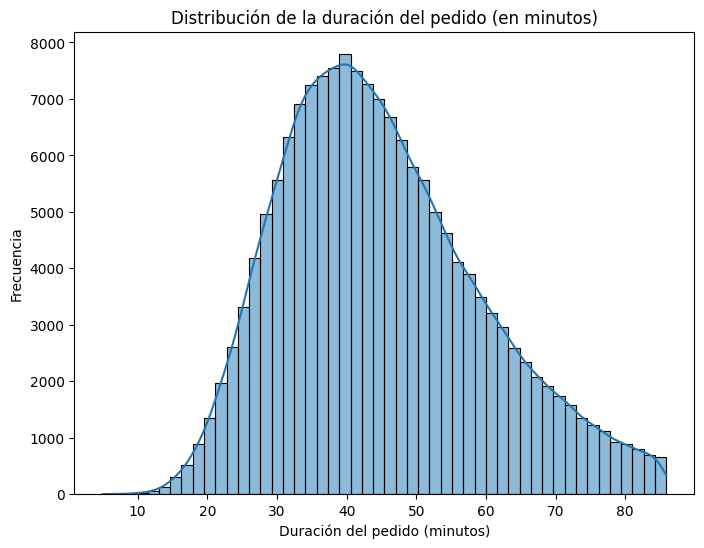

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para visualizar los outliers de la columna 'delivery_duration'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_delivery_l, x='delivery_duration')
plt.title('Boxplot de la duración del pedido (en minutos)')
plt.xlabel('Duración del pedido (minutos)')
plt.show()

# Histograma para ver la distribución de la columna 'delivery_duration'
plt.figure(figsize=(8, 6))
sns.histplot(df_delivery_l['delivery_duration'], kde=True, bins=50)
plt.title('Distribución de la duración del pedido (en minutos)')
plt.xlabel('Duración del pedido (minutos)')
plt.ylabel('Frecuencia')
plt.show()


In [8]:
import numpy as np

# Calcular los percentiles 25 (Q1) y 75 (Q3)
Q1 = df_delivery_l['delivery_duration'].quantile(0.25)
Q3 = df_delivery_l['delivery_duration'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Reemplazar los outliers por los valores más cercanos al rango
df_delivery_l['delivery_duration'] = np.where(df_delivery_l['delivery_duration'] < limite_inferior, limite_inferior,
                                            np.where(df_delivery_l['delivery_duration'] > limite_superior, limite_superior,
                                                     df_delivery_l['delivery_duration']))

# Verificar que no haya valores fuera del rango
print(df_delivery_l['delivery_duration'].describe())


count    162381.000000
mean         45.070636
std          14.360419
min           4.950000
25%          34.416667
50%          43.200000
75%          54.066667
max          83.541667
Name: delivery_duration, dtype: float64


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_46522/3815383851.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_l['delivery_duration'] = np.where(df_delivery_l['delivery_duration'] < limite_inferior, limite_inferior,


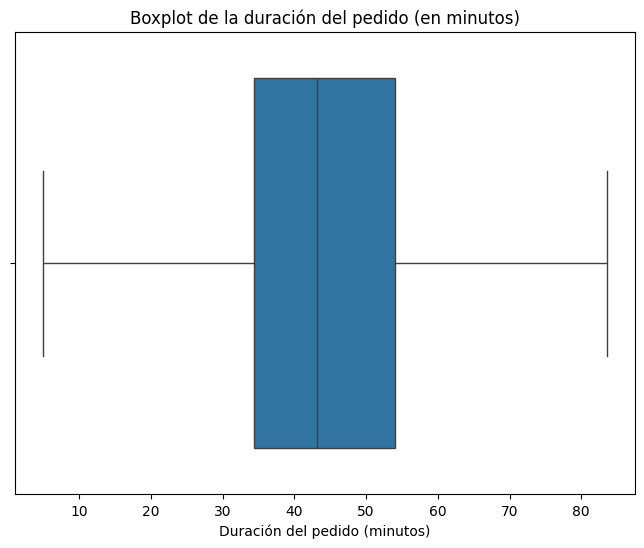

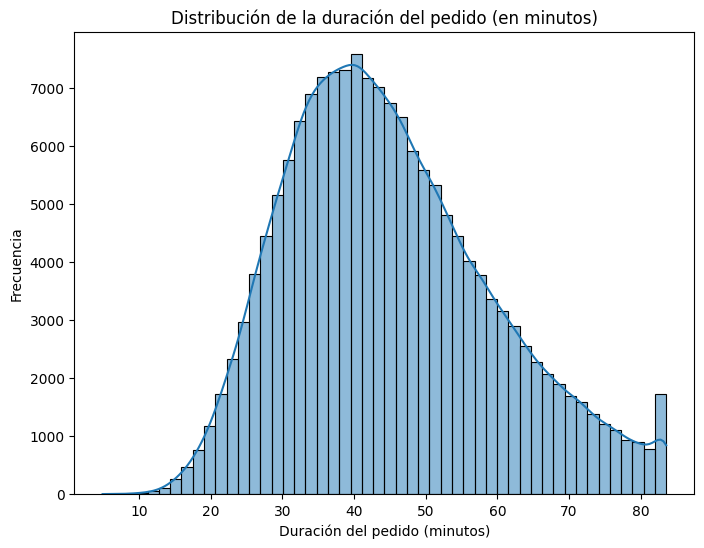

In [9]:
# Boxplot para visualizar los outliers de la columna 'delivery_duration'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_delivery_l, x='delivery_duration')
plt.title('Boxplot de la duración del pedido (en minutos)')
plt.xlabel('Duración del pedido (minutos)')
plt.show()

# Histograma para ver la distribución de la columna 'delivery_duration'
plt.figure(figsize=(8, 6))
sns.histplot(df_delivery_l['delivery_duration'], kde=True, bins=50)
plt.title('Distribución de la duración del pedido (en minutos)')
plt.xlabel('Duración del pedido (minutos)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd


# Selección de características relevantes
X = df_delivery_l[['order_day', 'grouped_category', 'order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']]
y = df_delivery_l['delivery_duration']

# Preprocesamiento de datos
columnas_categoricas = ['order_day', 'grouped_category']
columnas_numericas = ['order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']

# Usar ColumnTransformer para el preprocesamiento
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), columnas_categoricas),
        ('num', StandardScaler(), columnas_numericas)
    ])

# Definir el modelo
modelo = RandomForestRegressor(random_state=42)

# Crear el pipeline con preprocesamiento y el modelo
pipeline = Pipeline(steps=[('preprocesamiento', preprocesador),
                           ('modelo', modelo)])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Si se necesita optimizar los hiperparámetros, se puede usar GridSearchCV o RandomizedSearchCV
param_grid = {
    'modelo__n_estimators': [100, 200],
    'modelo__max_depth': [10, 20, 30],
    'modelo__min_samples_split': [2, 5],
    'modelo__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

MSE: 175.74861965755184
MAE: 10.487664718617994
R²: 0.1479082732227618


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Asegurarnos de que las columnas categóricas y numéricas estén correctamente definidas
columnas_categoricas = ['order_day', 'grouped_category']
columnas_numericas = ['order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']

# Preprocesamiento: Codificar las variables categóricas y normalizar las numéricas
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), columnas_categoricas),  # Codificación one-hot para las categóricas
        ('num', StandardScaler(), columnas_numericas)   # Normalización de las numéricas
    ])

# Definir el modelo de RandomForest
modelo_rf = RandomForestRegressor(random_state=42)

# Crear el pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocesamiento', preprocesador),
                           ('modelo', modelo_rf)])

# Definir el espacio de búsqueda para los hiperparámetros
parametros = {
    'modelo__n_estimators': [100, 200, 300, 400, 500],
    'modelo__max_depth': [5, 10, 15, 20, None],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__max_features': ['auto', 'sqrt', 'log2', None],
    'modelo__bootstrap': [True, False]
}

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_delivery[['order_day', 'grouped_category', 'order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']]
y = df_delivery['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar RandomizedSearchCV con validación cruzada
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parametros, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='r2')

# Entrenar el modelo con RandomizedSearch
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
mejores_parametros = random_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)

# Evaluar el modelo con los mejores parámetros
mejor_modelo = random_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

# Calcular MSE, MAE y R² para el modelo ajustado
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/U

Mejores parámetros encontrados: {'modelo__n_estimators': 400, 'modelo__min_samples_split': 10, 'modelo__min_samples_leaf': 4, 'modelo__max_features': None, 'modelo__max_depth': 15, 'modelo__bootstrap': True}
MSE: 190.15246744699047
MAE: 10.676905440972103
R²: 0.2668011254523922


In [ ]:
import joblib

# Guardo el modelo entrenado
joblib.dump(mejor_modelo, 'm_tiempo_pedido_normal.pkl')

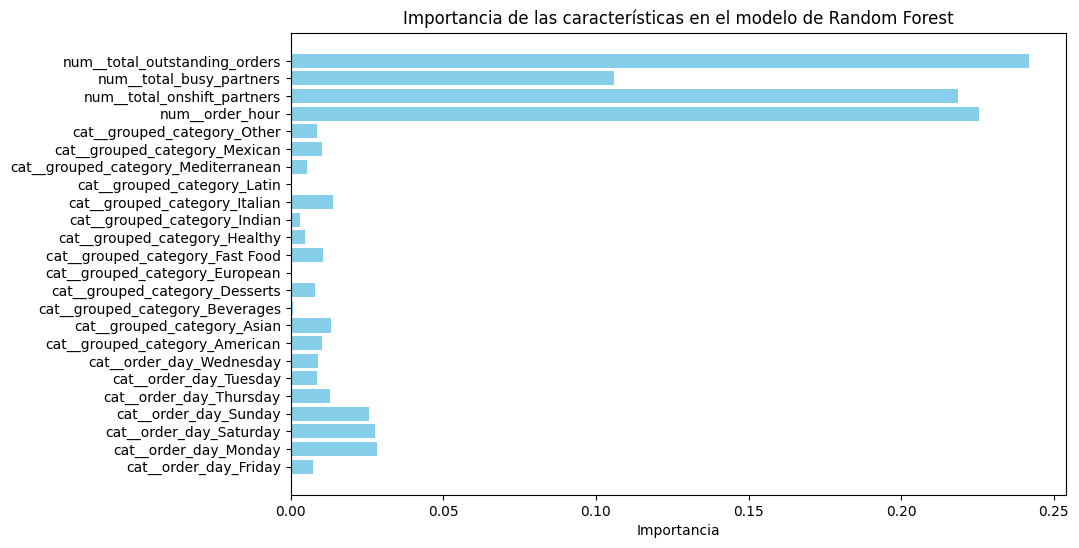

In [17]:
# Analizar la importancia de las características utilizando el modelo entrenado
import matplotlib.pyplot as plt

# Obtener las importancias de las características
importancias = mejor_modelo.named_steps['modelo'].feature_importances_

# Obtener los nombres de las características después de la transformación
caracteristicas = mejor_modelo.named_steps['preprocesamiento'].get_feature_names_out()

# Crear un gráfico de barras para visualizar las importancias
plt.figure(figsize=(10,6))
plt.barh(caracteristicas, importancias, color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las características en el modelo de Random Forest')
plt.show()

In [19]:
# Definir las columnas categóricas y numéricas
columnas_categoricas = ['order_day', 'grouped_category']
columnas_numericas = ['order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']

# Preprocesamiento: Codificar las variables categóricas y normalizar las numéricas
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), columnas_categoricas),  # Codificación one-hot para las categóricas
        ('num', StandardScaler(), columnas_numericas)   # Normalización de las numéricas
    ])

# Definir el modelo de RandomForest
modelo_rf = RandomForestRegressor(random_state=42)

# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline(steps=[('preprocesamiento', preprocesador),
                           ('modelo', modelo_rf)])

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_delivery[['order_day', 'grouped_category', 'order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']]
y = df_delivery['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline.predict(X_test)

# Calcular MSE, MAE y R² para el modelo ajustado
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2


(215.62863508062836, 11.34981216025648, 0.16856891375639238)

In [20]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores = cross_val_score(modelo_rf, X_train, y_train, cv=5, scoring='r2')

# Imprimir el resultado de la validación cruzada
print("Puntajes de R² en cada partición de la validación cruzada:", scores)
print("Promedio de R²:", scores.mean())


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Monday'


In [21]:
# Definir los parámetros para el subajuste (high bias)
parametros_subajuste = {
    'modelo__n_estimators': [50, 100],
    'modelo__max_depth': [5, 10],
    'modelo__min_samples_split': [10, 20],
    'modelo__min_samples_leaf': [5, 10],
    'modelo__max_features': ['sqrt', 'log2'],
    'modelo__bootstrap': [True]
}

# Realizar RandomizedSearch para subajuste
random_search_subajuste = RandomizedSearchCV(estimator=pipeline, param_distributions=parametros_subajuste, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='r2')

# Entrenar el modelo con RandomizedSearch (subajuste)
random_search_subajuste.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
mejores_parametros_subajuste = random_search_subajuste.best_params_
print("Mejores parámetros (subajuste):", mejores_parametros_subajuste)

# Evaluar el modelo de subajuste
mejor_modelo_subajuste = random_search_subajuste.best_estimator_
y_pred_subajuste = mejor_modelo_subajuste.predict(X_test)

# Calcular MSE, MAE y R² para el modelo subajustado
mse_subajuste = mean_squared_error(y_test, y_pred_subajuste)
mae_subajuste = mean_absolute_error(y_test, y_pred_subajuste)
r2_subajuste = r2_score(y_test, y_pred_subajuste)

print("MSE (subajuste):", mse_subajuste)
print("MAE (subajuste):", mae_subajuste)
print("R² (subajuste):", r2_subajuste)

# Definir los parámetros para el sobreajuste (high variance)
parametros_sobreajuste = {
    'modelo__n_estimators': [300, 400, 500],
    'modelo__max_depth': [15, 20, None],
    'modelo__min_samples_split': [2, 5],
    'modelo__min_samples_leaf': [1, 2],
    'modelo__max_features': [None, 'auto', 'sqrt'],
    'modelo__bootstrap': [True, False]
}

# Realizar RandomizedSearch para sobreajuste
random_search_sobreajuste = RandomizedSearchCV(estimator=pipeline, param_distributions=parametros_sobreajuste, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='r2')

# Entrenar el modelo con RandomizedSearch (sobreajuste)
random_search_sobreajuste.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
mejores_parametros_sobreajuste = random_search_sobreajuste.best_params_
print("Mejores parámetros (sobreajuste):", mejores_parametros_sobreajuste)

# Evaluar el modelo de sobreajuste
mejor_modelo_sobreajuste = random_search_sobreajuste.best_estimator_
y_pred_sobreajuste = mejor_modelo_sobreajuste.predict(X_test)

# Calcular MSE, MAE y R² para el modelo sobreajustado
mse_sobreajuste = mean_squared_error(y_test, y_pred_sobreajuste)
mae_sobreajuste = mean_absolute_error(y_test, y_pred_sobreajuste)
r2_sobreajuste = r2_score(y_test, y_pred_sobreajuste)

print("MSE (sobreajuste):", mse_sobreajuste)
print("MAE (sobreajuste):", mae_sobreajuste)
print("R² (sobreajuste):", r2_sobreajuste)


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros (subajuste): {'modelo__n_estimators': 50, 'modelo__min_samples_split': 10, 'modelo__min_samples_leaf': 5, 'modelo__max_features': 'sqrt', 'modelo__max_depth': 10, 'modelo__bootstrap': True}
MSE (subajuste): 212.9660676477242
MAE (subajuste): 11.369565067607743
R² (subajuste): 0.17883536715256865


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
58 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/U

Mejores parámetros (sobreajuste): {'modelo__n_estimators': 300, 'modelo__min_samples_split': 5, 'modelo__min_samples_leaf': 2, 'modelo__max_features': None, 'modelo__max_depth': 15, 'modelo__bootstrap': True}
MSE (sobreajuste): 191.05724448290883
MAE (sobreajuste): 10.701091436912069
R² (sobreajuste): 0.26331244337869375


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Definir las columnas categóricas y numéricas
columnas_categoricas = ['order_day', 'grouped_category']
columnas_numericas = ['order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']

# Preprocesamiento
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), columnas_categoricas),
        ('num', StandardScaler(), columnas_numericas)
    ])

# Crear el modelo de RandomForest
modelo_rf = RandomForestRegressor(random_state=42)

# Crear el pipeline
pipeline = Pipeline(steps=[('preprocesamiento', preprocesador),
                           ('modelo', modelo_rf)])

# Definir el espacio de búsqueda de hiperparámetros con regularización
parametros = {
    'modelo__n_estimators': [100, 200, 300, 400],
    'modelo__max_depth': [5, 10, 15, 20, None],  # Limitar la profundidad
    'modelo__min_samples_split': [2, 5, 10],  # Aumentar min_samples_split
    'modelo__min_samples_leaf': [1, 2, 4],  # Aumentar min_samples_leaf
    'modelo__max_features': ['sqrt', 'log2', None],  # Limitar el número de características
    'modelo__bootstrap': [True, False]  # Controlar el uso de bootstrap
}

# Dividir los datos en entrenamiento y prueba
X = df_delivery[['order_day', 'grouped_category', 'order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']]
y = df_delivery['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=parametros, cv=5, n_jobs=-1, scoring='r2')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
mejores_parametros = grid_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)

# Evaluar el modelo
mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

# Calcular MSE, MAE y R² para el modelo ajustado
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores parámetros encontrados: {'modelo__bootstrap': True, 'modelo__max_depth': 15, 'modelo__max_features': None, 'modelo__min_samples_leaf': 4, 'modelo__min_samples_split': 10, 'modelo__n_estimators': 400}
MSE: 190.15246744699047
MAE: 10.676905440972103
R²: 0.2668011254523922


***Reviso de nuevo la selección de características***

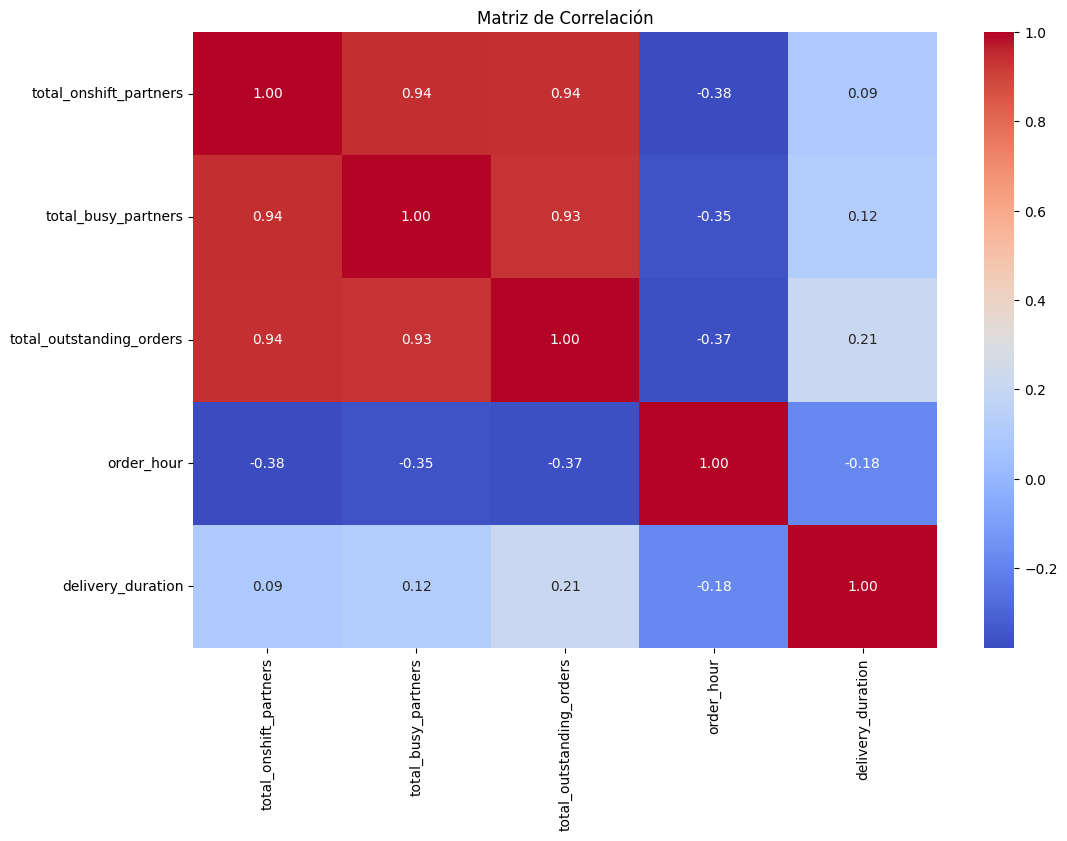

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numeric = df_delivery.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


In [28]:
# Eliminar las columnas redundantes
df_cleaned = df_delivery.drop(columns=['total_busy_partners', 'total_onshift_partners'])

# Dividir los datos nuevamente en conjunto de entrenamiento y prueba
X = df_cleaned[['order_day', 'grouped_category', 'order_hour', 'total_outstanding_orders']]
y = df_cleaned['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocesamiento', preprocesador),
                           ('modelo', modelo_rf)])

# Realizar el ajuste de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parametros, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='r2')

# Entrenar el modelo con RandomizedSearch
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
mejores_parametros = random_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)

# Evaluar el modelo con los mejores parámetros
mejor_modelo = random_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

# Calcular MSE, MAE y R² para el modelo ajustado
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


ValueError: 
All the 250 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'total_onshift_partners'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_indexing.py", line 364, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'total_onshift_partners'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py", line 993, in fit_transform
    self._validate_column_callables(X)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py", line 552, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_indexing.py", line 372, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [29]:
# Verificar las columnas del DataFrame antes de pasar a la siguiente fase
print(df_cleaned.columns)

Index(['grouped_category', 'total_outstanding_orders', 'order_hour',
       'order_day', 'delivery_duration'],
      dtype='object')


In [30]:
# Usar las columnas que están presentes en el DataFrame
columnas_categoricas = ['order_day', 'grouped_category']
columnas_numericas = ['order_hour', 'total_outstanding_orders']  # Solo las que están presentes

# Preprocesamiento: Codificar las variables categóricas y normalizar las numéricas
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), columnas_categoricas),  # Codificación one-hot para las categóricas
        ('num', StandardScaler(), columnas_numericas)   # Normalización de las numéricas
    ])

# Crear el pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocesamiento', preprocesador),
                           ('modelo', modelo_rf)])

# Asegúrate de usar el conjunto de datos actualizado
X = df_cleaned[['order_day', 'grouped_category', 'order_hour', 'total_outstanding_orders']]
y = df_cleaned['delivery_duration']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el espacio de búsqueda para los hiperparámetros
parametros = {
    'modelo__n_estimators': [100, 200, 300, 400, 500],
    'modelo__max_depth': [5, 10, 15, 20, None],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__max_features': ['auto', 'sqrt', 'log2', None],
    'modelo__bootstrap': [True, False]
}

# Inicializar RandomizedSearchCV con validación cruzada
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parametros, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='r2')

# Entrenar el modelo con RandomizedSearch
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
mejores_parametros = random_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)

# Evaluar el modelo con los mejores parámetros
mejor_modelo = random_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

# Calcular MSE, MAE y R² para el modelo ajustado
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/U

Mejores parámetros encontrados: {'modelo__n_estimators': 400, 'modelo__min_samples_split': 10, 'modelo__min_samples_leaf': 4, 'modelo__max_features': None, 'modelo__max_depth': 15, 'modelo__bootstrap': True}
MSE: 217.54790076291295
MAE: 11.446275577017913
R²: 0.161168518394175


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Asegurarnos de que las columnas categóricas y numéricas estén correctamente definidas
columnas_categoricas = ['order_day', 'grouped_category']
columnas_numericas = ['order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']

# Preprocesamiento: Codificar las variables categóricas y normalizar las numéricas
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), columnas_categoricas),  # Codificación one-hot para las categóricas
        ('num', StandardScaler(), columnas_numericas)   # Normalización de las numéricas
    ])

# Definir el modelo de RandomForest con los parámetros ya ajustados
modelo_rf = RandomForestRegressor(random_state=42)

# Crear el pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocesamiento', preprocesador),
                           ('modelo', modelo_rf)])

# Definir el espacio de búsqueda para los hiperparámetros con regularización
parametros = {
    'modelo__n_estimators': [100, 200, 300, 400, 500],
    'modelo__max_depth': [5, 10, 15, 20, None],  # Limitar la profundidad de los árboles
    'modelo__min_samples_split': [2, 5, 10],  # Aumentar los mínimos para evitar divisiones muy finas
    'modelo__min_samples_leaf': [1, 2, 4],  # Aumentar el número mínimo de muestras por hoja
    'modelo__max_features': ['auto', 'sqrt', 'log2', None],  # Restringir el número de características consideradas
    'modelo__bootstrap': [True, False]
}

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_delivery[['order_day', 'grouped_category', 'order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']]
y = df_delivery['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar RandomizedSearchCV con validación cruzada
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parametros, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='r2')

# Entrenar el modelo con RandomizedSearch
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
mejores_parametros = random_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)

# Evaluar el modelo con los mejores parámetros
mejor_modelo = random_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

# Calcular MSE, MAE y R² para el modelo ajustado
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/U

Mejores parámetros encontrados: {'modelo__n_estimators': 400, 'modelo__min_samples_split': 10, 'modelo__min_samples_leaf': 4, 'modelo__max_features': None, 'modelo__max_depth': 15, 'modelo__bootstrap': True}
MSE: 190.15246744699047
MAE: 10.676905440972103
R²: 0.2668011254523922


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Asegúrate de cargar el dataframe correctamente
df_cleaned = df_delivery.copy()

# Ingeniería de características

# Crear una columna 'is_weekend' que indica si el pedido es en fin de semana
df_cleaned['is_weekend'] = df_cleaned['order_day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Crear una columna 'order_time_of_day' que indica si es mañana, tarde o noche
df_cleaned['order_time_of_day'] = df_cleaned['order_hour'].apply(lambda x: 'morning' if x < 12 else ('afternoon' if x < 18 else 'night'))

# Crear una columna de relación entre los repartidores y los pedidos pendientes
df_cleaned['partner_order_ratio'] = df_cleaned['total_onshift_partners'] / (df_cleaned['total_outstanding_orders'] + 1)

# Realizar transformación logarítmica de la variable 'total_busy_partners' para reducir la dispersión
df_cleaned['log_total_busy_partners'] = np.log1p(df_cleaned['total_busy_partners'])

# Ver las primeras filas del dataframe después de agregar las nuevas características
print(df_cleaned.head())

  grouped_category  total_onshift_partners  total_busy_partners  \
0         American                    33.0                 14.0   
1          Mexican                     1.0                  2.0   
2           Indian                     8.0                  6.0   
3          Italian                     5.0                  6.0   
4          Italian                     5.0                  5.0   

   total_outstanding_orders  order_hour order_day  delivery_duration  \
0                      21.0          22    Friday          62.983333   
1                       2.0          21   Tuesday          67.066667   
2                      18.0           0    Monday          26.433333   
3                       8.0           3  Thursday          37.883333   
4                       7.0           2   Tuesday          49.800000   

   is_weekend order_time_of_day  partner_order_ratio  log_total_busy_partners  
0           0             night             1.500000                 2.708050  
1   

In [33]:
df_cleaned

,grouped_category,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,order_day,delivery_duration,is_weekend,order_time_of_day,partner_order_ratio,log_total_busy_partners
0,American,33.0,14.0,21.0,22,Friday,62.983333,0,night,1.500000,2.708050
1,Mexican,1.0,2.0,2.0,21,Tuesday,67.066667,0,night,0.333333,1.098612
2,Indian,8.0,6.0,18.0,0,Monday,26.433333,0,morning,0.421053,1.945910
3,Italian,5.0,6.0,8.0,3,Thursday,37.883333,0,morning,0.555556,1.945910
4,Italian,5.0,5.0,7.0,2,Tuesday,49.800000,0,morning,0.625000,1.791759
...,...,...,...,...,...,...,...,...,...,...,...
166463,Fast Food,17.0,17.0,23.0,0,Tuesday,65.116667,0,morning,0.708333,2.890372
166464,Fast Food,12.0,11.0,14.0,0,Friday,56.383333,0,morning,0.800000,2.484907
166465,Fast Food,39.0,41.0,40.0,4,Saturday,50.133333,1,morning,0.951220,3.737670
166466,Fast Food,7.0,7.0,12.0,18,Sunday,65.116667,1,night,0.538462,2.079442


In [34]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = df_cleaned[['order_day', 'grouped_category', 'order_hour', 'total_onshift_partners', 
                'total_busy_partners', 'total_outstanding_orders', 'is_weekend', 
                'order_time_of_day', 'partner_order_ratio', 'log_total_busy_partners']]
y = df_cleaned['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: Codificar las variables categóricas y normalizar las numéricas
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['order_day', 'grouped_category', 'order_time_of_day']),  # Codificación one-hot para las categóricas
        ('num', StandardScaler(), ['order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders', 'partner_order_ratio', 'log_total_busy_partners'])   # Normalización de las numéricas
    ])

# Definir el modelo de RandomForest
modelo_rf = RandomForestRegressor(random_state=42)

# Crear el pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocesamiento', preprocesador),
                           ('modelo', modelo_rf)])

# Definir el espacio de búsqueda para los hiperparámetros
parametros = {
    'modelo__n_estimators': [100, 200, 300, 400, 500],
    'modelo__max_depth': [5, 10, 15, 20, None],  # Limitar la profundidad de los árboles
    'modelo__min_samples_split': [2, 5, 10],  # Aumentar los mínimos para evitar divisiones muy finas
    'modelo__min_samples_leaf': [1, 2, 4],  # Aumentar el número mínimo de muestras por hoja
    'modelo__max_features': ['auto', 'sqrt', 'log2', None],  # Restringir el número de características consideradas
    'modelo__bootstrap': [True, False]
}

# Inicializar RandomizedSearchCV con validación cruzada
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parametros, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='r2')

# Entrenar el modelo con RandomizedSearch
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
mejores_parametros = random_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)

# Evaluar el modelo con los mejores parámetros
mejor_modelo = random_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

# Calcular MSE, MAE y R² para el modelo ajustado
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

/Users/luismgl/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/U

Mejores parámetros encontrados: {'modelo__n_estimators': 500, 'modelo__min_samples_split': 2, 'modelo__min_samples_leaf': 4, 'modelo__max_features': 'sqrt', 'modelo__max_depth': 20, 'modelo__bootstrap': True}
MSE: 188.7925174139578
MAE: 10.640114119591486
R²: 0.272044885089319


In [35]:
# Crear características adicionales

# Día de la semana - Si es fin de semana o no
df_cleaned['is_weekend'] = df_cleaned['order_day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Hora del pedido - Si es hora pico (por ejemplo, entre las 18 y 20 horas)
df_cleaned['is_peak_hour'] = df_cleaned['order_hour'].apply(lambda x: 1 if 18 <= x <= 20 else 0)

# Relación entre repartidores y pedidos
df_cleaned['partner_order_ratio'] = df_cleaned['total_onshift_partners'] / (df_cleaned['total_outstanding_orders'] + 1)

# Transformación logarítmica de 'total_busy_partners'
df_cleaned['log_total_busy_partners'] = np.log1p(df_cleaned['total_busy_partners'])

# Ahora las características adicionales han sido agregadas.
# Dividimos el conjunto de datos para el modelo
X = df_cleaned[['order_day', 'grouped_category', 'order_hour', 'total_onshift_partners', 
                'total_busy_partners', 'total_outstanding_orders', 'is_weekend', 
                'is_peak_hour', 'partner_order_ratio', 'log_total_busy_partners']]
y = df_cleaned['delivery_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: Codificar las variables categóricas y normalizar las numéricas
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['order_day', 'grouped_category']),  # Codificación one-hot para las categóricas
        ('num', StandardScaler(), ['order_hour', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders', 
                                   'partner_order_ratio', 'log_total_busy_partners'])   # Normalización de las numéricas
    ])

# Definir el modelo de RandomForest con los parámetros ajustados
modelo_rf = RandomForestRegressor(random_state=42)

# Crear el pipeline
pipeline = Pipeline(steps=[('preprocesamiento', preprocesador),
                           ('modelo', modelo_rf)])

# Definir el espacio de búsqueda para los hiperparámetros
parametros = {
    'modelo__n_estimators': [100, 200, 300, 400],
    'modelo__max_depth': [5, 10, 15, 20, None],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__max_features': ['sqrt', 'log2', None],
    'modelo__bootstrap': [True, False]
}

# Inicializar RandomizedSearchCV con validación cruzada
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parametros, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='r2')

# Entrenar el modelo
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
mejores_parametros = random_search.best_params_
print("Mejores parámetros encontrados:", mejores_parametros)

# Evaluar el modelo con los mejores parámetros
mejor_modelo = random_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

# Calcular MSE, MAE y R² para el modelo ajustado
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores parámetros encontrados: {'modelo__n_estimators': 200, 'modelo__min_samples_split': 5, 'modelo__min_samples_leaf': 4, 'modelo__max_features': 'log2', 'modelo__max_depth': 20, 'modelo__bootstrap': True}
MSE: 189.9744815252679
MAE: 10.673893305486791
R²: 0.2674874119846914


In [40]:
df_cleaned.columns

Index(['grouped_category', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day',
       'delivery_duration', 'is_weekend', 'order_time_of_day',
       'partner_order_ratio', 'log_total_busy_partners', 'is_peak_hour'],
      dtype='object')

In [44]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Asegurándonos de que las columnas correctas sean usadas
columnas_categoricas = ['order_day', 'grouped_category', 'order_time_of_day']
columnas_numericas = ['order_hour', 'total_onshift_partners', 'total_busy_partners', 
                      'total_outstanding_orders', 'partner_order_ratio', 'log_total_busy_partners', 'is_weekend', 'is_peak_hour']

# Preprocesamiento: Codificar las variables categóricas y normalizar las numéricas
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), columnas_categoricas),  # Codificación one-hot para las categóricas
        ('num', StandardScaler(), columnas_numericas)   # Normalización de las numéricas
    ])

# Dividir los datos en conjunto de entrenamiento y prueba
X = df_cleaned[columnas_categoricas + columnas_numericas]
y = df_cleaned['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el preprocesamiento manualmente
X_train_transformed = preprocesador.fit_transform(X_train)
X_test_transformed = preprocesador.transform(X_test)

# Definir el modelo de XGBoost
modelo_xgb = xgb.XGBRegressor(random_state=42, objective="reg:squarederror")

# Definir el espacio de búsqueda para los hiperparámetros específicos de XGBoost
parametros_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Realizar la búsqueda de hiperparámetros manualmente
mejores_parametros_xgb = None
mejor_r2 = -np.inf
for n_estimators in parametros_xgb['n_estimators']:
    for max_depth in parametros_xgb['max_depth']:
        for learning_rate in parametros_xgb['learning_rate']:
            for subsample in parametros_xgb['subsample']:
                for colsample_bytree in parametros_xgb['colsample_bytree']:
                    for min_child_weight in parametros_xgb['min_child_weight']:
                        
                        modelo_xgb.set_params(
                            n_estimators=n_estimators, max_depth=max_depth, 
                            learning_rate=learning_rate, subsample=subsample,
                            colsample_bytree=colsample_bytree, min_child_weight=min_child_weight)
                        
                        # Entrenar el modelo
                        modelo_xgb.fit(X_train_transformed, y_train)
                        
                        # Evaluar el modelo
                        y_pred_xgb = modelo_xgb.predict(X_test_transformed)
                        r2 = r2_score(y_test, y_pred_xgb)
                        
                        # Si el R² es mejor que el mejor obtenido hasta ahora, guardar estos parámetros
                        if r2 > mejor_r2:
                            mejores_parametros_xgb = {
                                'n_estimators': n_estimators,
                                'max_depth': max_depth,
                                'learning_rate': learning_rate,
                                'subsample': subsample,
                                'colsample_bytree': colsample_bytree,
                                'min_child_weight': min_child_weight
                            }
                            mejor_r2 = r2

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros de XGBoost:", mejores_parametros_xgb)

# Evaluar el modelo con los mejores parámetros
modelo_xgb.set_params(**mejores_parametros_xgb)
modelo_xgb.fit(X_train_transformed, y_train)

# Realizar predicciones
y_pred_xgb = modelo_xgb.predict(X_test_transformed)

# Calcular MSE, MAE y R² para el modelo ajustado
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("MSE (XGBoost):", mse_xgb)
print("MAE (XGBoost):", mae_xgb)
print("R² (XGBoost):", r2_xgb)


Mejores parámetros de XGBoost: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 5}
MSE (XGBoost): 188.90425238481427
MAE (XGBoost): 10.634613329167717
R² (XGBoost): 0.27161405210576894


In [54]:
# Definir las columnas numéricas para el análisis de outliers
numerical_columns = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders', 
                     'order_hour', 'partner_order_ratio', 'log_total_busy_partners', 'is_weekend', 'is_peak_hour']

# Calcular el rango intercuartílico (IQR) para detectar outliers
Q1 = df_cleaned[numerical_columns].quantile(0.25)
Q3 = df_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
df_no_outliers = df_cleaned[~((df_cleaned[numerical_columns] < lower_bound) | (df_cleaned[numerical_columns] > upper_bound)).any(axis=1)]

# Mostrar los datos después de eliminar outliers
print(f"Datos originales: {df_cleaned.shape}")
print(f"Datos después de eliminar outliers: {df_no_outliers.shape}")


Datos originales: (166468, 12)
Datos después de eliminar outliers: (119808, 12)


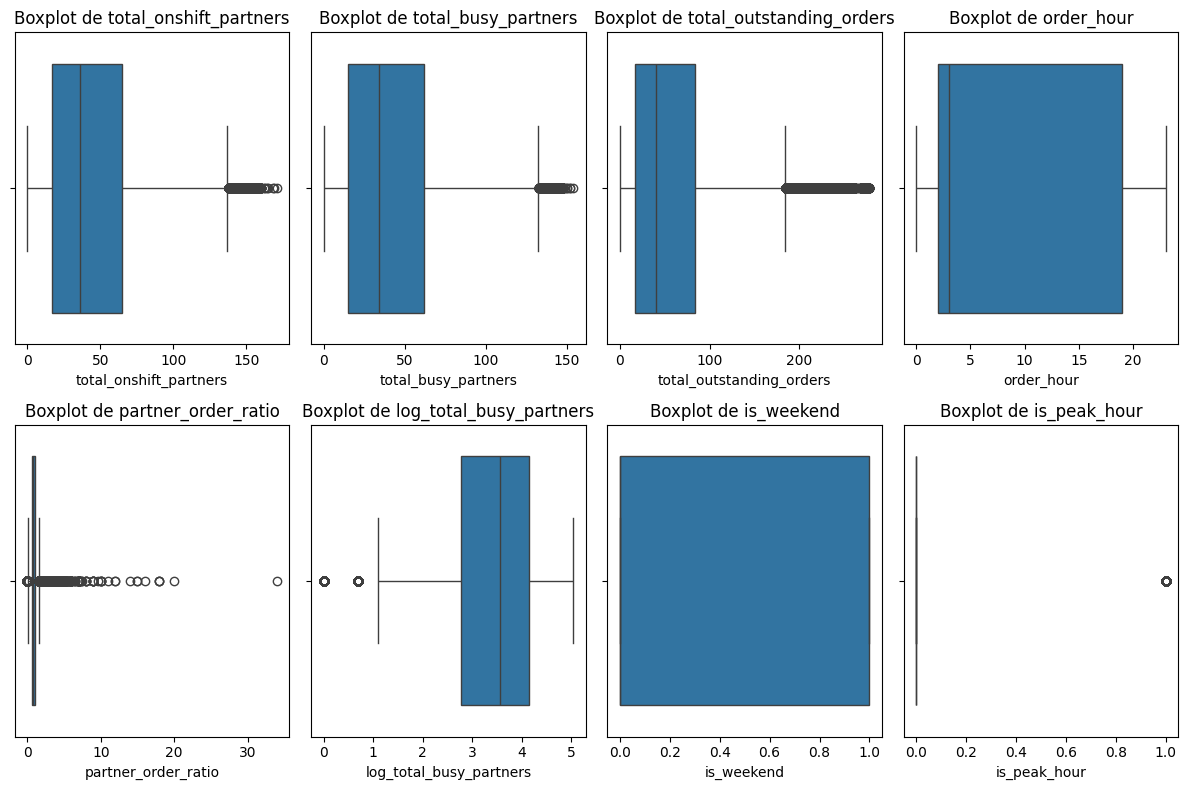

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear boxplots para cada característica numérica
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()


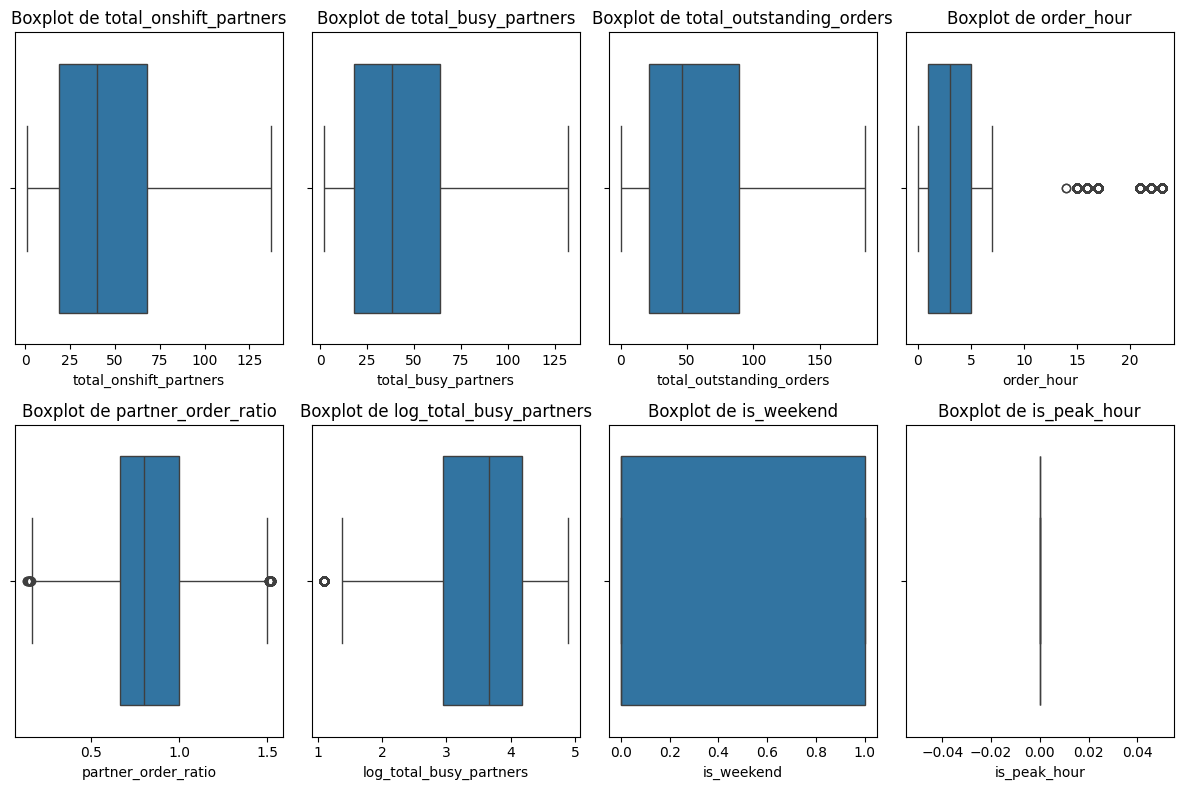

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear boxplots para cada característica numérica
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

In [60]:
# Definir las columnas categóricas
categorical_columns = ['grouped_category', 'order_day', 'order_time_of_day']

# Crear un transformer para hacer One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough'
)

# Crear un pipeline con preprocesamiento y modelo de RandomForest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo', RandomForestRegressor(random_state=42))
])

# Parámetros para RandomForest
parametros_rf = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [10, 15, 20],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__max_features': ['auto', 'sqrt', 'log2']
}

# Realizar búsqueda aleatoria de parámetros
random_search_rf = RandomizedSearchCV(pipeline_rf, parametros_rf, n_iter=10, cv=5, n_jobs=-1, random_state=42, scoring='r2')
random_search_rf.fit(X_train, y_train)

# Evaluar el modelo de RandomForest
mejor_modelo_rf = random_search_rf.best_estimator_
y_pred_rf = mejor_modelo_rf.predict(X_test)

# Métricas de RandomForest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mejores parámetros RandomForest:", random_search_rf.best_params_)
print(f"MSE RandomForest: {mse_rf}")
print(f"MAE RandomForest: {mae_rf}")
print(f"R² RandomForest: {r2_rf}")

# Repetir para XGBoost
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo', xgb.XGBRegressor(random_state=42))
])

# Parámetros para XGBoost
parametros_xgb = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [10, 15, 20],
    'modelo__learning_rate': [0.01, 0.05, 0.1],
    'modelo__subsample': [0.6, 0.8, 1.0],
    'modelo__colsample_bytree': [0.6, 0.8, 1.0],
    'modelo__min_child_weight': [1, 5, 10]
}

# Realizar búsqueda aleatoria de parámetros para XGBoost
random_search_xgb = RandomizedSearchCV(pipeline_xgb, parametros_xgb, n_iter=10, cv=5, n_jobs=-1, random_state=42, scoring='r2')
random_search_xgb.fit(X_train, y_train)

# Evaluar el modelo de XGBoost
mejor_modelo_xgb = random_search_xgb.best_estimator_
y_pred_xgb = mejor_modelo_xgb.predict(X_test)

# Métricas de XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Mejores parámetros XGBoost:", random_search_xgb.best_params_)
print(f"MSE XGBoost: {mse_xgb}")
print(f"MAE XGBoost: {mae_xgb}")
print(f"R² XGBoost: {r2_xgb}")


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Us

Mejores parámetros RandomForest: {'modelo__n_estimators': 300, 'modelo__min_samples_split': 10, 'modelo__min_samples_leaf': 4, 'modelo__max_features': 'sqrt', 'modelo__max_depth': 20}
MSE RandomForest: 188.7201268492137
MAE RandomForest: 10.637671862550542
R² RandomForest: 0.2723240120515449


/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/Users/luismgl/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/Users/luismgl/Library/Python/3.9/lib/

AttributeError: 'super' object has no attribute '__sklearn_tags__'